<a id='top'></a>
# Investigating-Data Project: Which Passengers on board of the Titanic Vessel were more likely to survive the Tragedy?
## <center>by Karine Legrand</center>
### <center>December 2021</center>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have chosen to conduct a Data Analysis on the Passengers of the tragically well known 'RMS Titanic' Ship. On April 14th 1912, the infamous Vessel hit an Iceberg at night during its opening Atlantic Cossing and sank near the coast of Newfoundland/Canada. Despite more than 2 hours time for evacuating the People on board, a large majority (about $68.8\%$) of the Passengers and members of the Crew did not survive the Tragedy. It is known to be essentially due to the Lack of sufficient Lifeboats on board, as well as a great lack of Experience from the Crew members, to handle such a rescue operation. An Exploratory Data Analysis can help us investigate which other factors possibly affected the chance of survival.

The Dataset, to be found on [Kaggle](https://www.kaggle.com/c/titanic/data) contains a subset list of the Passengers that were on board with characteristic informations for each of them and wether they survived or not.

I will explore the data, conduct an analysis and provide visualizations of variables of interest, that I will chose to inspect during the phase of [Data Wrangling](#wrangling).<br>


We first need to import all the python libraries that we need:

In [3]:
# import all packages and set inline magic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we will first load the data, identify the variables provided, assess and clean the data if needed, before we get in further explorations.



### Gathering the Data:
The Data is provided in the 'train.csv' file that we first load in a Dataframe

In [4]:
# Load the csv file
df_titanic= pd.read_csv('train.csv')
print(df_titanic.shape)

(891, 12)


Their are 891 rows in the Dataframe, each containing 12 columns or variables.

### First Glance at the Data using head, info and describe and first decisions about the variables of interest:

In [6]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Are there any duplicates in the Dataframe?

In [4]:
df_titanic.duplicated().sum()

0

There are no duplicates. Each row is a distinct valid observation (characteristics for one person on board of the ship).

I decided to drop some columns, for clarity purposes, for the corresponding independant variables "PassengerId, Name and Ticket", which I suspect not to correlate with our outcome variable.


In [5]:
df_titanic.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


Overview of the Columns-meaning:
- "SibSp" stands for "Siblings/Spouse",
- "ParCh" stands for "Parents/Children",
Both variables indicates if a Passenger had Sibling(s)/Partner and Parents/Children on board or none of them and travelling alone,
- "Embarked" is related to the Port on the Route where People embarked, either "S for Southampton", "C for Cherbourg" or "Q for Queenstown" in the Uk and in France,
- "Fare" is the price the person paid for him/herself and their family if any,
- "Cabin" is the Reference number of the reserved cabin if any,
- "Pclass" is the Travel-class of the Passenger (First, Second or Third).
The other columns are self explanatory.

What is the type of the variables, are there missing values?

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


The Data Types seem to be matching the types for all columns.<br>
There are missing values for the columns \['Age', 'Cabin', 'Embarked'\]. Before inspecting them closer and decide how tho handle them, let us gain some statistics summary for the numerical variables with 'describe' and have an overview of the distributions.

In [7]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


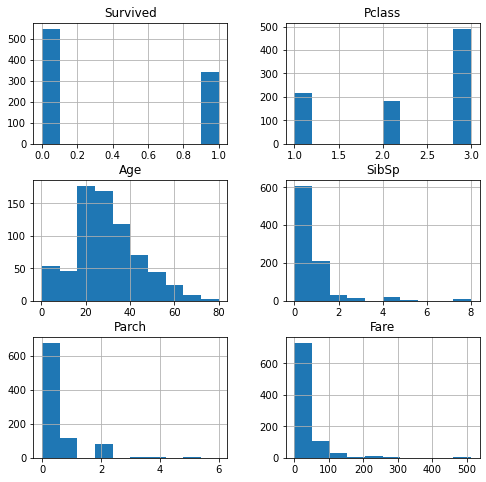

In [8]:
df_titanic.hist(figsize= (8,8));

In [9]:
print(df_titanic.Survived.mean()*100)

38.38383838383838


**First Assessments and Overview of the numerical variables:**<br><br>
**Distribution of the 'Age' variable:**<br>
Most of the People were approximately between 20 and 40 years old. There were also some very young children (not even one year old)and a few elderly People on board (One was 80 year old). In average, People were about 30 year old.<br>
**Distribution of the 'Pclass' variable:**<br>
About 200 People travelled each in First and Second Class and most of them, more than the double, travelled in the cheapest Third-class.<br>
**Distribution of 'SibSp' and 'ParCh' variables:**<br>
A vast majority of the People travelled alone.<br>
**Distribution of 'Fare' variable:**<br>
A vast majority of People, $75\%$, paid less than 31\$ for the trip (which matches the fact that most people travelled in Third-class)<br>
**Distribution for the 'Survived' variable:**<br>
Most people, $61.6\%$ of them, did not survive (which is a slightly smaller proportion as the real Proportion of People who died in the Tragedy, since we are working on a Dataset with less than half of the total Passengers that were on board (2200)) 

#### Decision for handling the Quality Issue concerning missing values for the 'Age' column:

Let us inspect the rows for which the 'Age' value is missing. We want to make sure these records do not have a certain characteristic in common for example, which would make them being a distinct group of People. 

In [10]:
df_age_missing= df_titanic[df_titanic.Age.isnull()]
print(df_age_missing.shape)

(177, 9)


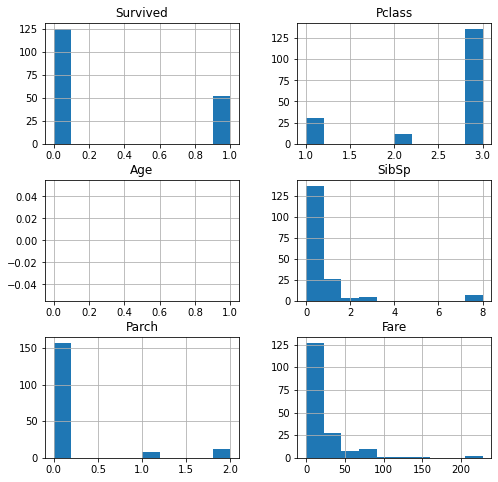

In [11]:
df_age_missing.hist(figsize=(8,8));

The characteristics for these rows do not show any particular difference from the whole dataset, we decide to handle these missing values by replacing them with the average age.<br>
**We will handle this quality issue in the next "Data Cleaning" section.** 

#### Decision for handling the Quality Issue concerning missing values for the 'Embarked' column:

In [12]:
print(df_titanic[df_titanic.Embarked.isnull()].shape)

(2, 9)


Since there are only 2 rows missing this information we can decide to just drop them.<br>We will do this, as well, in the next **"Data Cleaning"** section.

**Decision for handling missing values in the 'Cabin' column:**
We suspect there is a value in the column only for the passengers that did have a cabin. So mainly for First class plus the members of the crew. We could either replace the missing values with "None" or just ignore the missing values. Let us have a look to confirm if our Intuition was right:

In [13]:
df_cabin= df_titanic.loc[df_titanic.Cabin.notna()]
df_cabin.Pclass.value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

We decide to replace missing values with 'None .

### Data Cleaning: Handling the quality issues detected previously

#### Quality Issue 1: 
#### Define: 
We want to replace missing values in the 'Age' column by its mean value.

#### Code:

In [14]:
df_titanic.Age.fillna(df_titanic.Age.mean(), inplace=True)

#### Test:

In [15]:
print(df_titanic.Age.isna().sum())

0


#### Quality Issue 2:

#### Define:
We drop the 2 rows with missing values in the 'Embarked' column:

#### Code:

In [16]:
df_titanic.dropna(subset=['Embarked'], inplace=True)

#### Test:

In [17]:
print(df_titanic.shape)

(889, 9)


#### Quality Issue 3:

#### Define:
We replace the missing values in the 'Cabin' column with 'None:

#### Code:

In [18]:
df_titanic.Cabin.fillna('None', inplace=True)

#### Test:

In [19]:
print(df_titanic.Cabin.isna().sum())

0


In [20]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Cabin     889 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


### Insights from assessing the Dataset and for conducting the Exploratory Data Analysis:

#### What is the structure of the dataset?
The Dataset contains 889 observations of persons embarked on the Titanic Vessel. There are 9 columns we decided to keep describing characteristics of each Person.


#### What is/are the main feature(s) of interest in the dataset?
I will investigate the Survival of the Passengers and which characteristics possibly affected this outcome.   
Eventually I want to try and answer the core following Questions:<br><br>
"Were some Passengers more likely to survive than others, based on their:
- Age ?
- Gender ?
- The Class they travelled in ?"</br>

I will first depict each variable of interest in the "Univariate Exploration" section and then investigate their possible correlation in the "Bivariate/Multivariate Exploration".


<a id='eda'></a>
## Exploratory Data Analysis<br>
<ul>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#multi">Bivariate/Multivariate Exploration</a></li>
</ul>

It's a good idea to first make a working copy of the dataframe.

In [21]:
df_eda= df_titanic.copy()
print(df_eda.shape)
df_eda.head()

(889, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,None,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,None,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,None,S


<a id='univariate'></a>
### Univariate Exploration<br>
<li><a href="#survival">Distribution of Survival</a></li>
<li><a href="#age">Distribution of Age</a></li>
<li><a href="#sex">Gender Distribution</a></li>
<li><a href="#class">Distribution of Classes</a></li>


<li><a href="#top">Back to Top</a></li>

<a id='survival'></a>
#### Investigating the Rate of Survival 

In [22]:
survivor_count= df_eda.Survived.value_counts()
survivor_count

0    549
1    340
Name: Survived, dtype: int64

In [23]:
one= df_eda.Survived.sum()
zero= len(df_eda[df_eda.Survived==0])
print(one, zero)

340 549


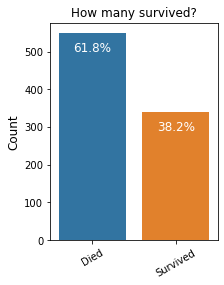

In [24]:
# We plot a Bar chart
fig= plt.figure(figsize=(3,4));
sns.barplot(x= survivor_count.index, y= survivor_count)
plt.ylabel('Count', fontdict={'fontsize':12});
locs, labels= plt.xticks()
plt.title('How many survived?');

# we want to add the relative frequency in percentage for each bar
number_of_people= df_eda.shape[0]
#print("Number of Passengers: ", number_of_people)
locs,labels = plt.xticks()
for loc,label in zip(locs, labels):
    #print(loc, label, label.get_text())
    absolute= survivor_count[loc]# get the count for each bar
    pct_str= '{:0.1f}%'.format(absolute/number_of_people*100)# percent with one decimal precision
    plt.text(loc, absolute-50, pct_str, ha='center', color='white', fontsize=12);
    # absolute-50 is used to display the percentage value, lower than the top of each bar 
plt.xticks(locs, labels=['Died', 'Survived'], rotation= 30);

As we have seen before, most of all People on board died. $61.8\%$ precisely, against $38.2\%$ who survived.

[Back to Univariate Exploration](#univariate)

<a id='age'></a>
#### Investigating the Dataset by Age

We will plot a Histogram to see the distribution of the People by age.

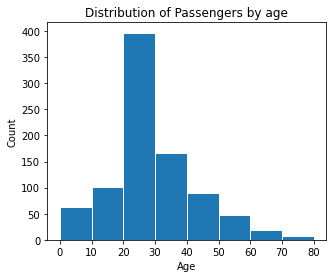

In [25]:
bins_x= np.arange(0, df_eda.Age.max()+1, 10)
plt.figure(figsize=[5,4])
n, bins, patches= plt.hist(data=df_eda, x='Age', bins=bins_x , edgecolor='white');
plt.xlabel("Age");
plt.ylabel("Count");
plt.title("Distribution of Passengers by age"); # with ';' we exclude the supplementary output

In [26]:
#Debug
#print(locs_y)
print("bins: ",bins)
print("number of people in each bin: ", n)

bins:  [ 0. 10. 20. 30. 40. 50. 60. 70. 80.]
number of people in each bin:  [ 62. 102. 397. 166.  89.  48.  18.   7.]


In [27]:
print("Number of people between 20 and 40: ", n[2]+n[3])
print(f"These are {(n[2]+n[3])/len(df_eda)*100:.1f}% of the Passengers")

Number of people between 20 and 40:  563.0
These are 63.3% of the Passengers


Most of the People, $63.3\%$, were between 20 and 40 years old  

<li><a href="#univariate">Back to Univariate</a></li>

<a id='sex'></a>
#### Investigating the Dataset by Gender

We will plot a Pie Chart to get an Idea of the Proportions of People by gender.

In [28]:
# First compute the Distribution by gender
by_gender= df_eda.Sex.value_counts()
print(by_gender)

male      577
female    312
Name: Sex, dtype: int64


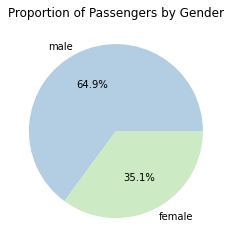

In [29]:
# Let's get some colors
cmap= plt.get_cmap('Pastel1')
cmap = plt.cm.Pastel1
pastel_colors = cmap([1, 2])

#Plot a Pie Chart
plt.pie(by_gender, labels=by_gender.index, autopct='%1.1f%%', colors= pastel_colors);
plt.title('Proportion of Passengers by Gender');

There were much more Men (about $65\%$) than Women (about $35\%$) on bord.

[Back to Univariate Exploration](#univariate)

<a id='class'></a>
#### Investigating the Dataset by Travelling-Class

We want to see the Distribution of Passengers by Class. Therefore we will plot a Pie Chart.

In [30]:
# First compute the Distribution by gender
by_class= df_eda.Pclass.value_counts()
by_class.index= ["Class "+str(i) for i in by_class.index]
print(by_class)

Class 3    491
Class 1    214
Class 2    184
Name: Pclass, dtype: int64


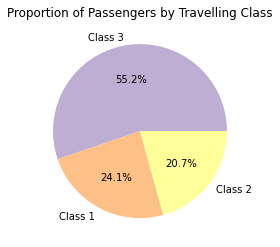

In [31]:
# Let's get some colors
#cmap= plt.get_cmap('Pastel1')
cmap = plt.cm.Accent
pastel_colors = cmap([1, 2, 3])

#Plot a Pie Chart
plt.pie(by_class, labels=by_class.index, autopct='%1.1f%%', colors= pastel_colors);
plt.title('Proportion of Passengers by Travelling Class');

People were mostly travelling in the lowest, Third Class (exactly $55.2\%$), more than the total of people travelling in First and Second Class ($44.8\%$) 

### Conclusion on the Univariate Exploration:

In this section we gained precise statistical informations about our Variables of interest:
- Much more People died than survived ($61.8\%$ vs. $38.2\%$)
- Peoples' age varied from less than a year to 80 years old and most of them $63.3\%$, were between 20 and 40 years old
- There were much more Men (about $65\%$) than Women (about $35\%$) on bord.
- Most People travelled in the third Class ($55.2\%$), more than the total of people travelling in first and second Class ($44.8\%$) 

In the next Section we want to investigate possible correlations of our independant variables of interest with the outcome. In other words, we want to explore if the Age, Gender and Travelling Class characteristics of the Passengers influenced their chance of Survival. 

<li><a href="#eda">Back To Exploratory Data Analysis</a></li>

<a id='multi'></a>
### Bivariate/Multivariate Exploration<br>
<li><a href="#sexsur">Gender vs. Survived</a></li>
<li><a href="#agesur">Age vs. Survived</a></li>
<li><a href="#classsur">Class vs. Survived</a></li>


<a id='sexsur'></a>
#### Investigating  the correlation between 'Gender' and 'Survived'


To facilitate plotting our results grouped by Gender, we will first create a new categorical variable 'Fate', holding wether a Passenger survived or not as categories 'Died' or 'Survived':

In [32]:
df_eda['Fate']= np.where(df_eda.Survived == 1, 'Survived', 'Died')
df_eda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fate
0,0,3,male,22.0,1,0,7.2500,None,S,Died
1,1,1,female,38.0,1,0,71.2833,C85,C,Survived
2,1,3,female,26.0,0,0,7.9250,None,S,Survived
3,1,1,female,35.0,1,0,53.1000,C123,S,Survived
4,0,3,male,35.0,0,0,8.0500,None,S,Died


We can now plot a Barchart, grouped by gender, and by fate: 

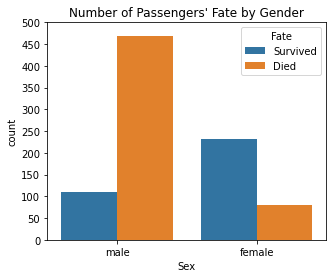

In [33]:
fig= plt.figure(figsize=(5,4))
sns.countplot(data=df_eda, x='Sex', hue='Fate', hue_order=['Survived', 'Died']);
plt.title("Number of Passengers' Fate by Gender");
plt.yticks(np.arange(0, 501, 50));

We can see an obvious Difference among the two Groups, but since there are much less Women than Men, we want to emphasize the Results, by showing Proportions of Survival Chances, for the two groups, instead of absolute Counts.

In [34]:
# get proportions for each Fate, for each Gender
fate_props_bygender = (df_eda.groupby(['Sex'])['Fate']
                     .value_counts(normalize=True)# get proportions instead of counts
                     .rename('Percentage')
                     .mul(100) # get percents
                     .reset_index()) # flattens the groupby object to get a dataframe back
print(fate_props_bygender.head())

      Sex      Fate  Percentage
0  female  Survived   74.038462
1  female      Died   25.961538
2    male      Died   81.109185
3    male  Survived   18.890815


Now that we have proportions within the two gender groups, we can show an even greater difference between them, wether Passengers did survive or not:

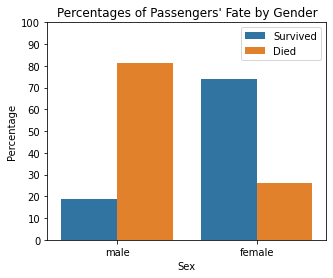

In [35]:
fig=plt.figure(figsize=[5,4]);
p = sns.barplot(x="Sex", y="Percentage", hue="Fate", data=fate_props_bygender, hue_order= \
                ['Survived', 'Died'], order= ['male', 'female']);
plt.legend(loc= 'upper right');
plt.title("Percentages of Passengers' Fate by Gender");
plt.yticks(np.arange(0, 101, 10));

The results are even more obvious plotting proportions instead of counts: Most of the Men died, about $80\%$, whereas, as opposite, most of the Women survived, about $75\%$.
We see an obvious correlation between 'Gender' and 'Fate'. 

<a id='agesur'></a>
#### Investigating the correlation between the 'Age' and 'Survived' variables

Let's plot a histogram of the distribution of 'Age' for each 'Fate' group:

In [36]:
df_survived= df_eda.query('Fate == "Survived"')
df_died= df_eda.query('Fate == "Died"')

[ 62. 102. 397. 166.  89.  48.  18.   7.]
[ 0.42   4.399  8.378 12.357 16.336 20.315 24.294 28.273 32.252 36.231
 40.21  44.189 48.168 52.147 56.126 60.105 64.084 68.063 72.042 76.021
 80.   ]
[ 0.42   4.399  8.378 12.357 16.336 20.315 24.294 28.273 32.252 36.231
 40.21  44.189 48.168 52.147 56.126 60.105 64.084 68.063 72.042 76.021
 80.   ]
[ 13.   5.  11.  16.  52.  62.  55. 174.  38.  28.  23.  23.  15.   9.
   8.   7.   4.   5.   1.   0.]


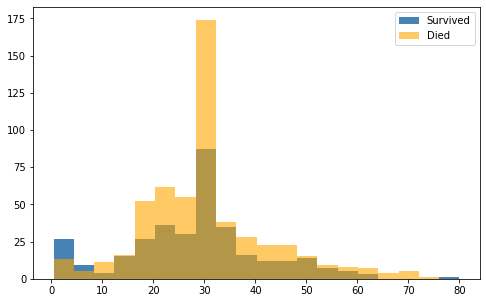

In [37]:
# plot 2 histograms on the same figure
fig= plt.figure(figsize=[8,5])
n1, bins1, patches1= plt.hist(df_survived.Age, bins=20, color='steelblue', label='Survived')
n2, bin2, patches2= plt.hist(df_died.Age, bins=bins1, color='orange', alpha=0.6, label='Died');
plt.legend();
print(n) # gives us the amount of passengers in each bin
print(bins1)
print(bin2)# we set the bins of the second hist to be the same as the first to better compare each height values
print(n2)

We see something interesting in this plot and have to differenciate our Interpretation: If we look at both distributions, starting from about 10 years of age, they seem to follow a very similar curve, both with a peak between about 28 and 32 years (this reflecting that most people fall in this bin): It does not look like there is any kind of correlation between 'Age' and 'Fate' in this case. And for each of those bins, more people died than survived.<br>
Interestingly, we observe the oppposite tendency for young Children until about $8$ and $\frac{1}{2}$ years and especially those younger than $4$ and $\frac{1}{2}$ years: Much more Babies and very young Children survived.

<li><a href="#eda">Back To Exploratory Analysis</a></li>

<a id='classsur'></a>
#### Inverstigating the correlation between Travelling 'Class' and 'Survived'

We can plot a barchart of Passengers grouped by 'Pclass' and 'Fate':

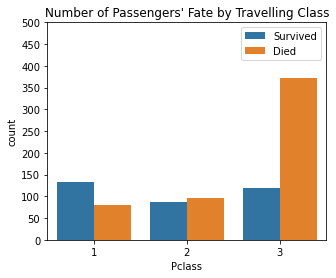

In [38]:
fig= plt.figure(figsize=(5,4))
sns.countplot(data=df_eda, x='Pclass', hue='Fate', hue_order=['Survived', 'Died']);
plt.title("Number of Passengers' Fate by Travelling Class");
plt.yticks(np.arange(0, 501, 50));
plt.legend(loc='best');

We can see a strong correlation of the two variables in the result,best seen in the first and third class levels where there is a clear opposite tendency: In the third class, where most People travelled in, a big majority of people died, whereas, in the first class, most people survived. Travelling in the second class, appearently did not make such a difference wether people survived or not.

As much more people travelled in the third class than in the two others, we also can calculate and plot the proportions of people's fate in each class, rather than showing the absolute count in each group, just as we did for gender groups:

In [39]:
# get proportions for each Fate, for each Gender
fate_byclass = (df_eda.groupby(['Pclass'])['Fate']
                     .value_counts(normalize=True)# get proportions instead of counts
                     .rename('Percentage')
                     .mul(100) # get percents
                     .reset_index()) # flattens the groupby object to get a dataframe back
print(fate_byclass.head())

   Pclass      Fate  Percentage
0       1  Survived   62.616822
1       1      Died   37.383178
2       2      Died   52.717391
3       2  Survived   47.282609
4       3      Died   75.763747


Now we can plot the Proportions of people that survived in each travelling class:

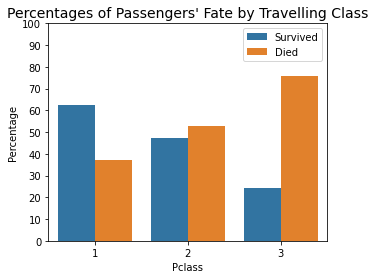

In [40]:
fig=plt.figure(figsize=[5,4]);
p = sns.barplot(x="Pclass", y="Percentage", hue="Fate", data=fate_byclass, hue_order= \
                ['Survived', 'Died']);
plt.legend(loc='best');
plt.title("Percentages of Passengers' Fate by Travelling Class", fontsize=14);
plt.yticks(np.arange(0, 101, 10));

Plotting proportions instead of counts, we can make a finer interpretation of the results:<br>
There is an obvious difference in the Fate of people across the different travelling classes:
- In the third class much more people Died than survived, about $75\%$
- In the first class, it is the opposite: more people survived than died, about $62\%$ vs. $38%$
- In the second class just a slight bigger proportion of people died than survived.(I could imagine the members of the crew were embarked in this class and I assume a lot died rescuing others but also helped leading safety operations in the life boats, for instance)

<li><a href="#eda">Back to Exploratory Analysis</a></li>

<li><a href="#top">Back to Top</a></li>

<a id='conclusions'></a>
## Conclusions on the Insights:



The Bivariate Exploration helped us gain following Insights of Correlation between 'Gender', 'Class', 'Age' and 'Survived'and to find answers to our questions:
- Most of the Men died, about $80\%$, whereas, as opposite, most of the Women survived, about $75\%$
- Babies and young children until about $8$ years old seem to had more chances to survive
- A big proportion of People in the third class died, $75\%$, whereas most people travelling first class did survive,  about $62\%$
These characteristics of the passengers seem to have certainly affected wether they could survive the Tragedy.

### Limitations:
We could have gained supplementary Insights on other variables that may have affected the chance of surviving, as
the Embarkment Place and wether People travelled alone or not, for instance.
Also, it would have been interesting to have supplementary information to identify members of the crew and investigate the chances of survival for this particular group